# Analysis of Mother Mortality in Australia

We will examine a large dataset centered on Australia's historical maternal mortality ratios in this portfolio task. The Kaggle dataset includes several socioeconomic indicators that could affect maternal health results. Our main goal is to investigate patterns in maternal death rates and pinpoint important variables related to these rates. The dataset contains factors like education levels, access to health care, economic indicators, and demographic information. By doing this analysis, we want to gain important insights into public health policy and intervention initiatives by training predictive models to estimate maternal mortality rates and assessing the benefits and drawbacks of these models.

There are over 1000s of features in this dataset. Glimpses of some features are

|Columns||
|:-----:|:-----:|
|year|
|Intentional homicides, female (per 100,000 female)|
|Battle-related deaths (number of people)|
|School enrollment|
|tertiary (gross)|
|gender parity index (GPI)|
|Short-term debt (% of total reserves)|
|Net ODA received (% of gross capital formation)|
|Subsidies and other transfers (% of expense)|
|.|
|.|
|.|
|.|
|.|
|PPP (current international $)|
|Coverage of social insurance programs in 2nd quintile (% of population)|


### Data Exploration

In [231]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
file_path = 'australia_economic.csv'
australia_data = pd.read_csv(file_path)
print(australia_data.head())
print(australia_data.info())

   year  Intentional homicides, female (per 100,000 female)  \
0  1960                                                NaN    
1  1961                                                NaN    
2  1962                                                NaN    
3  1963                                                NaN    
4  1964                                                NaN    

   Battle-related deaths (number of people)  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   Voice and Accountability: Percentile Rank  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Transport services (% of commercial service ex

### Feature Visualisation

C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unmet need for contraception (% of married women ages 15-49)'
 'Female headed households (% of households with a female head)'
 'Consumption of iodized salt (% of households)'
 'People with basic handwashing facilities including soap and water (% of population)'
 'Incidence of malaria (per 1,000 population at risk)'
 'Children (0-14) living with HIV'
 'Condom use, population ages 15-24, female (% of females ages 15-24)'
 'Women who believe a husband is justified in beating his wife (any of five reasons) (%)'
 'Women who believe a husband is justified in beating his wife when she argues with him (%)'
 'Trained teachers in upper secondary education (% of total teachers)'
 'Trained teachers in lower secondary education (% of total teachers)'
 'Progression to secondary school (%)'
 'Pupil-teacher ratio, upper secondary'
 'Trained teachers in primary educatio

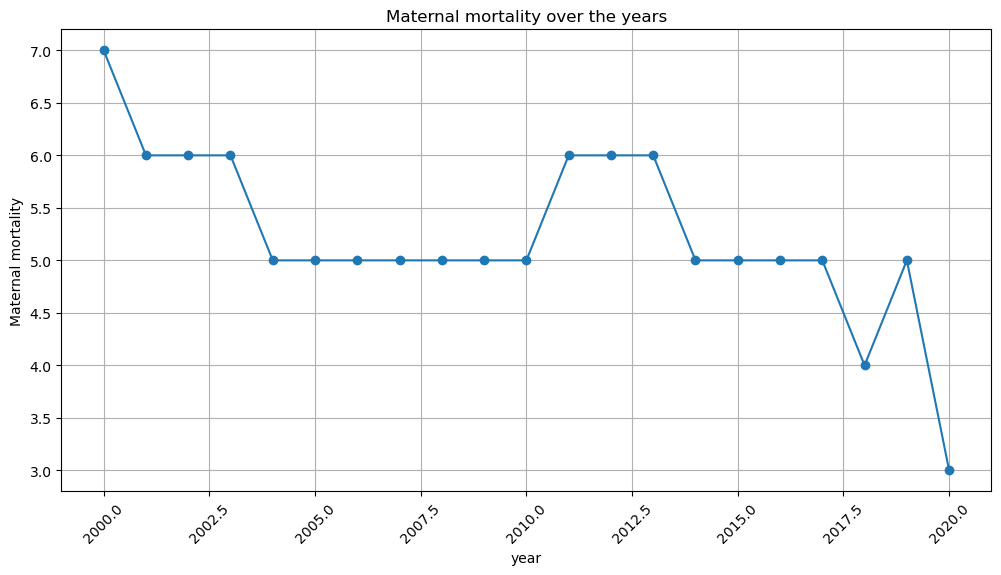

In [234]:
target_variable = "Maternal mortality ratio (modeled estimate, per 100,000 live births)"
if target_variable in australia_data.columns:
    X = australia_data.drop(columns=['year', target_variable])
    y = australia_data[target_variable]
    imputer = SimpleImputer(strategy='mean')
    X = imputer.fit_transform(X)
    y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()
    plt.figure(figsize=(12, 6))
    plt.plot(australia_data['year'], australia_data[target_variable], marker='o')
    plt.title('Maternal mortality over the years')
    plt.xlabel('year')
    plt.ylabel('Maternal mortality')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

### Data Cleansing

In [237]:
cleaned_data = australia_data.fillna(australia_data.mean())
print("Missing values in each column before cleaning:\n", australia_data.isnull().sum())
print("Missing values in each column after cleaning:\n", cleaned_data.isnull().sum())

Missing values in each column before cleaning:
 year                                                                                                 0
Intentional homicides, female (per 100,000 female)                                                  31
Battle-related deaths (number of people)                                                            62
Voice and Accountability: Percentile Rank                                                           39
Transport services (% of commercial service exports)                                                29
                                                                                                    ..
Electricity production from oil sources (% of total)                                                 7
Electricity production from hydroelectric sources (% of total)                                       7
Access to electricity, urban (% of urban population)                                                31
Access to clean fuels and

### Data Selection

In [240]:
correlation_matrix = cleaned_data.corr()
correlation_with_target = correlation_matrix['Maternal mortality ratio (modeled estimate, per 100,000 live births)'].sort_values(ascending=False)
all_features = correlation_with_target.index.tolist()
if 'year' in all_features:
    all_features.remove('year')
selected_features = random.sample(all_features, min(20, len(all_features)))  
print("Randomly Selected Features:", selected_features)

Randomly Selected Features: ['Taxes on exports (% of tax revenue)', 'Technical cooperation grants (BoP, current US$)', 'External health expenditure per capita, PPP (current international $)', 'Cost to export, border compliance (US$)', 'PPG, commercial banks (NFL, current US$)', 'Part time employment, total (% of total employment)', 'Mortality rate, adult, male (per 1,000 male adults)', 'Tariff rate, most favored nation, simple mean, manufactured products (%)', 'Services, value added (constant 2015 US$)', 'Taxes less subsidies on products (current US$)', 'Rural land area (sq. km)', 'Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)', 'Primary education, teachers', 'Firms formally registered when operations started (% of firms)', 'Merchandise imports by the reporting economy (current US$)', 'Source data assessment of statistical capacity (scale 0 - 100)', 'Taxes on goods and services (% of revenue)', 'GDP deflator (base year varies by country)', 'N

### Features Plotting

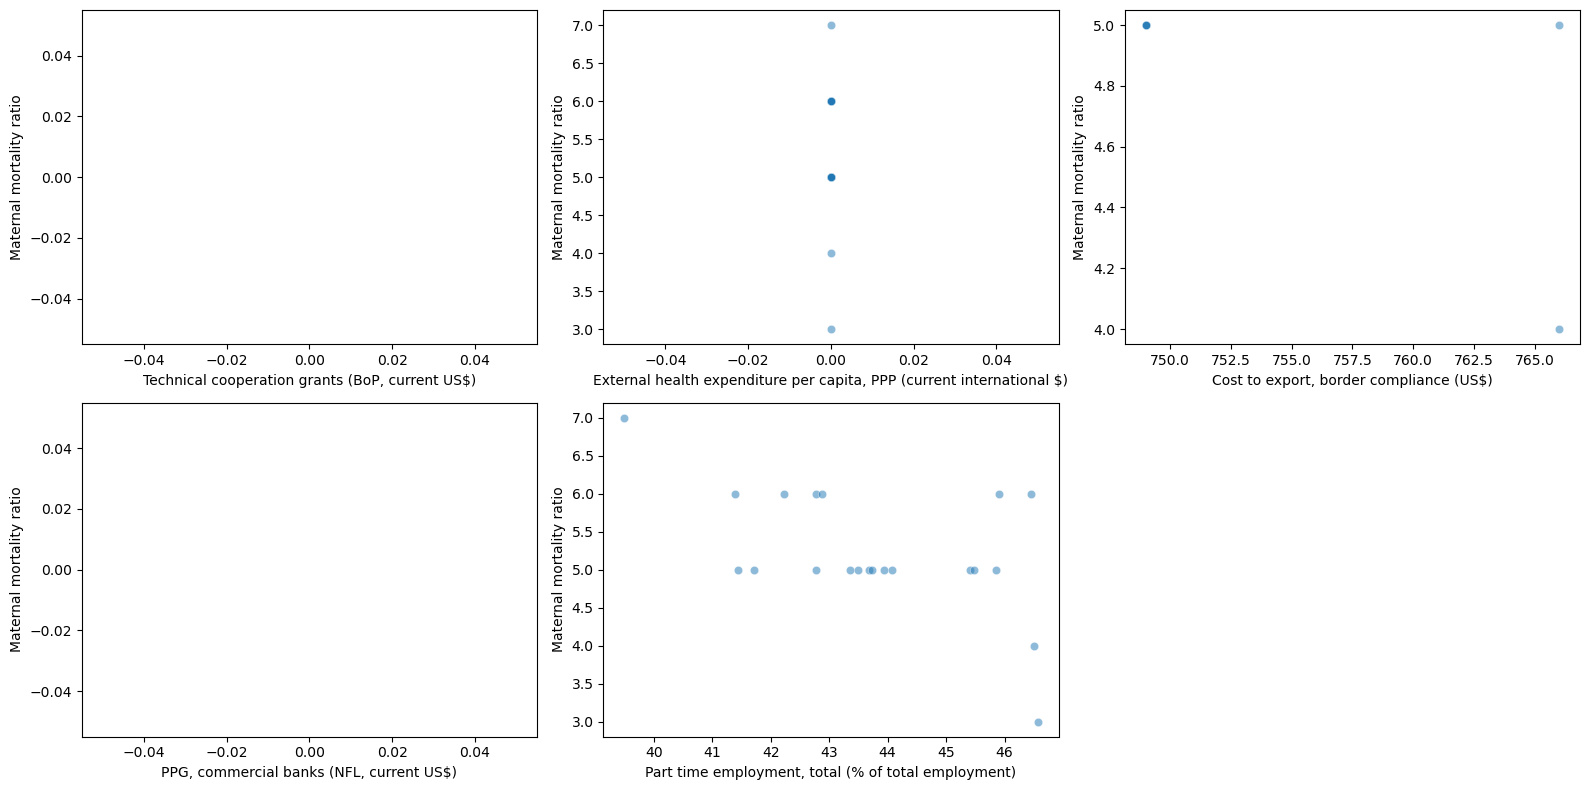

In [243]:
features_eg = selected_features[1:6]  
plt.figure(figsize=(16, 8))

for i, feature_eg in enumerate(features_eg):
    plt.subplot(2, (len(features_eg) + 1) // 2, i + 1)  
    sns.scatterplot(x=feature_eg, y='Maternal mortality ratio (modeled estimate, per 100,000 live births)', data=australia_data, alpha=0.5)
    plt.xlabel(feature_eg)  
    plt.ylabel('Maternal mortality ratio')  

plt.tight_layout()  
plt.show()
    


### Data Split

In [246]:
target_variable = "Maternal mortality ratio (modeled estimate, per 100,000 live births)"
X = cleaned_data.drop(columns=['year', target_variable])
y = cleaned_data[target_variable]
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  
y = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  
scaler = StandardScaler()
X = scaler.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nn_model = MLPRegressor(max_iter=1000, random_state=42)

C:\Users\dhruv\anaconda3\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: ['Unmet need for contraception (% of married women ages 15-49)'
 'Female headed households (% of households with a female head)'
 'Consumption of iodized salt (% of households)'
 'People with basic handwashing facilities including soap and water (% of population)'
 'Incidence of malaria (per 1,000 population at risk)'
 'Children (0-14) living with HIV'
 'Condom use, population ages 15-24, female (% of females ages 15-24)'
 'Women who believe a husband is justified in beating his wife (any of five reasons) (%)'
 'Women who believe a husband is justified in beating his wife when she argues with him (%)'
 'Trained teachers in upper secondary education (% of total teachers)'
 'Trained teachers in lower secondary education (% of total teachers)'
 'Progression to secondary school (%)'
 'Pupil-teacher ratio, upper secondary'
 'Trained teachers in primary educatio

### Artificial Neural Network

Training Mean Squared Error (Neural Network): 0.005642822005171236
Test Mean Squared Error (Neural Network): 0.7027804537532211


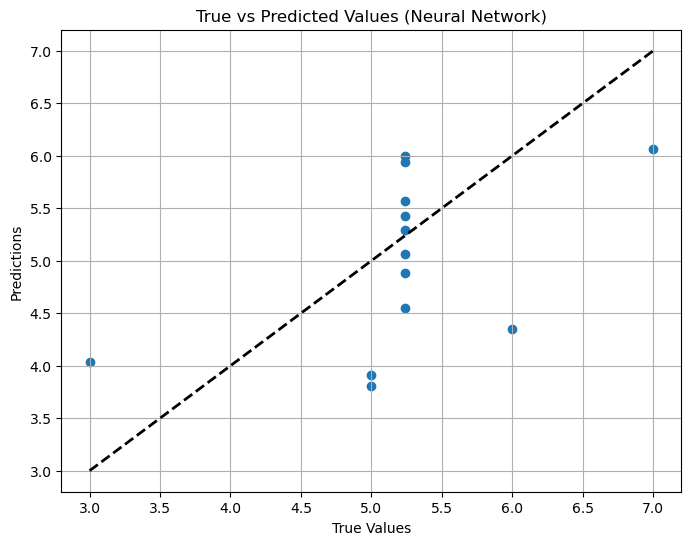

Best parameters found: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50), 'solver': 'sgd'}


In [249]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01], 
}
grid_search = GridSearchCV(nn_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_nn_model = grid_search.best_estimator_
train_predictions = best_nn_model.predict(X_train)
test_predictions = best_nn_model.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Training Mean Squared Error (Neural Network):", train_mse)
print("Test Mean Squared Error (Neural Network):", test_mse)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_predictions)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values (Neural Network)')
plt.grid()
plt.show()
print("Best parameters found:", grid_search.best_params_)


### Decision Tree

In [251]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
train_predictions = decision_tree_model.predict(X_train)
test_predictions = decision_tree_model.predict(X_test)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
print("Training Mean Squared Error (Decision Tree):", train_mse)
print("Test Mean Squared Error (Decision Tree):", test_mse)

Training Mean Squared Error (Decision Tree): 2.1457016622011523e-30
Test Mean Squared Error (Decision Tree): 0.5384615384615384
